In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import yfinance as yf

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy import stats

import tqdm


C:\Users\david\anaconda3\lib\site-packages\yfinance\base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [2]:
df_prices = pd.read_excel(r"C:\Users\david\Desktop\дипломная\код\data\data_prices.xlsx")


In [3]:
df_indicators = pd.read_excel(r"C:\Users\david\Desktop\дипломная\код\data\data_cluster_not_clear.xlsx")

In [4]:
df_prices = df_prices[::-1]
df_prices.set_index("Date", inplace=True)
# оставляем данные до 2023
df_prices = df_prices.iloc[19:, :]

In [5]:
df_prices

,A,AAL,AAP,AAPL,ABT,ACN,ADBE,ADI,ADM,ADP,...,WU,WY,WYNN,XEL,XOM,XRAY,YUM,ZBH,ZBRA,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2023-12-29,139.070007,13.95,61.150002,193.899994,110.400002,351.790009,596.090027,199.869995,72.150002,232.429993,...,11.93,34.910000,91.620003,61.689999,100.370003,35.380001,130.410004,121.459999,274.730011,44.650002
2023-12-28,140.539993,13.92,61.310001,194.139999,109.849998,354.140015,597.440002,200.860001,71.989998,232.119995,...,11.75,34.810001,90.889999,61.520000,101.389999,35.590000,130.839996,120.930000,274.109985,44.060001
2023-12-27,139.779999,14.10,61.220001,192.490005,109.040001,354.500000,598.599976,198.869995,72.080002,231.889999,...,11.75,34.770000,91.000000,61.730000,102.040001,35.709999,130.449997,121.199997,276.500000,44.959999
2023-12-26,139.309998,14.25,61.240002,193.610001,108.510002,354.140015,598.919983,197.899994,71.550003,231.589996,...,11.82,34.430000,90.570000,61.980000,102.739998,35.240002,129.880005,120.220001,270.000000,44.099998
2023-12-22,139.610001,14.38,60.150002,195.179993,108.860001,350.000000,600.799988,197.619995,71.110001,228.990005,...,11.88,34.299999,90.000000,61.980000,102.309998,35.189999,129.899994,120.300003,266.769989,44.279999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-03-10,23.748213,7.80,41.910000,7.993929,26.297838,41.959999,35.270000,29.760000,30.559999,38.086040,...,16.35,43.560001,69.930000,21.110001,67.160004,34.509998,26.376707,57.223301,28.980000,19.500000
2010-03-09,23.555079,7.38,42.040001,7.796786,26.000362,41.200001,35.060001,29.270000,30.469999,37.884109,...,16.18,43.250000,68.699997,21.120001,66.320000,34.250000,26.017254,57.456310,28.770000,18.740000
2010-03-08,23.683834,7.45,42.330002,7.857500,26.086725,41.060001,35.119999,29.430000,30.670000,37.901669,...,16.34,43.430000,68.080002,21.150000,66.769997,34.220001,25.233644,58.378639,28.900000,18.910000


In [6]:
#расчет стд котировок и годовой доходности
annual_return = []
std_price = []

for i in range(0, len(df_prices)-249, 249):
    local_return = list(round((df_prices.iloc[i, :] / df_prices.iloc[i + 249, :] - 1)*100, 2))
    local_std = list(round(np.std(df_prices.iloc[i:i+249, :]), 2))
    annual_return.append(local_return)
    std_price.append(local_std)

In [7]:
#не грузить

#рандом выбор 
#df_indicators["ROE_0"][df_indicators["ROE_0"].notnull()].sample(n = 10)
#вывод индексов значения которых = nan
#df_indicators["ROE_0"][df_indicators['ROE_0'].isnull()].index

In [7]:
#парсер секторов всех компаний из df_indicators

sector_name = []

for i in df_indicators["indicators"]:
    local_ticker = i.split(".")[0]
    try:
        company_sector = yf.Ticker(local_ticker).info["sector"]
        sector_name.append(company_sector)
    except:
        sector_name.append(None)
        
#добавляю сектор к df
df_indicators["sector"] = sector_name

In [8]:
len(annual_return)

13

In [9]:
#поиск тикеров которые ессть и в df_indicators и df_prices

number_in = []
index_df_prices = []
not_in_len = 0

for i in list(df_indicators["indicators"]):
    i = i.split(".")[0]
    if i in list(df_prices.columns):
        number_in.append(i)
        index_df_prices.append(df_prices.columns.get_loc(i))
    else:
        print(i)
        not_in_len += 1
        

CFG
PSTG
MPC
XYL
CSL
PSX
HWM
TOL
ENTG
ABBV
WSM
VEEV
KDP
ELV
ANET
LAMR
ZG
MOH
SUI
HPE
FBIN
TXRH
AZPN
BAH
CPAY
DOC
TKO
WBD
PAG
STLD
ARES
CSGP
FICO
GGG
EWBC
TREX
HEI
EME
MKL
TRU
AGR
UTHR
WTRG
RGEN
SCI
WSO
ZTS
FWONA
REXR
GLPI
PAYC
OVV
RGA
COTY
GM
CBOE
JBL
LECO
APO
MRVL
KKR
SCCO
EPAM
ACM
TWLO
NOW
IQV
FNF
ET
BURL
HII
FSLR
COR
BFb
DOX
NTRA
CTRA
PAA
FI
WRK
BMRN
TSLA
BRO
WES
AMH
USFD
MDB
DKS
H
HUBS
ENPH
BLD
ARCC
FTV
WMS
BLDR
TEAM
BG
FDS
BX
SRPT
EPD
CNA
CLH
RVTY
EQT
CQP
META
NDSN
PCG
RRX
MPLX
EXAS
WDAY
LPLA
XPO
CTLT
KEYS
SYF
MEDP
GDDY
ELS
CDW
CPT
SNX
FIVE
PYPL
SQ
TTD
CUBE
NBIX
ITT
BALL
BRKa
CASY
CLF
CG
PODD
HUBB
FANG
THC
OC
AFG
RPM
TECH
WPC
ON
BRKR
KHC
NWSA
AXON
KMI
QRVO
TRGP
PFGC
SAIA
WLK
DECK
PANW
RS
SSNC
DINO
ALLY


In [10]:
#беру значения return и std тех компаний для которых есть все необходимые даннные 
global_return = []
global_std = []

#до 10 т к данные до 2023 года
for r, s in zip(annual_return[:10], std_price[:10]):
    year_list_return = []
    year_list_std = []
    for i in index_df_prices:
        year_list_return.append(r[i])
        year_list_std.append(r[i])
    global_return.append(year_list_return)
    global_std.append(year_list_std)
        
        
    

In [12]:
#добавляю в df данные по доходности и риску 

#позже добавить

#df_indicators[["indicators", "Earnings_Per_Share_0"]]


In [11]:
#вручную подберу сектор для компаний у которых стоит  sector = None

df_indicators["sector"][df_indicators["sector"].isnull()]

232    None
433    None
Name: sector, dtype: object

In [12]:
df_indicators.iloc[232, [-1]] = "Utilities"
df_indicators.iloc[433, [-1]] = "Financial Services"

In [13]:
df_indicators

,indicators,Company,ROE_0,ROE_1,ROE_2,ROE_3,ROE_4,ROE_5,ROE_6,ROE_7,...,Earnings_Per_Share_1,Earnings_Per_Share_2,Earnings_Per_Share_3,Earnings_Per_Share_4,Earnings_Per_Share_5,Earnings_Per_Share_6,Earnings_Per_Share_7,Earnings_Per_Share_8,Earnings_Per_Share_9,sector
0,PG.N,Procter & Gamble Co,0.31200,0.31530,0.31620,0.28850,0.2401,0.2085,0.1887,0.1725,...,0.008838,0.028906,0.098158,0.095544,0.059282,0.066847,0.048267,0.032574,0.031178,Consumer Defensive
1,DTE.N,DTE Energy Co,0.11039,0.12520,0.15089,0.11540,0.1064,0.1157,0.1080,0.1066,...,0.055530,0.003960,0.159229,0.117686,0.009841,0.131748,0.046246,0.095674,0.042159,Utilities
2,CFG.N,Citizens Financial Group Inc,NaN,0.09000,0.10000,0.04600,0.0845,0.0862,0.0649,0.0523,...,0.153598,0.184205,1.328914,0.440255,0.076688,0.361531,0.313325,0.247361,0.002277,Financial Services
3,CHTR.OQ,Charter Communications Inc,0.45109,0.43640,0.24589,0.11660,0.0493,0.0326,0.0150,0.0534,...,0.034587,0.297406,0.460967,0.897196,0.296776,1.014720,0.427494,1.368987,0.150591,Communication Services
4,PSTG.N,Pure Storage Inc,NaN,0.52909,0.29480,0.06839,0.0931,0.0892,-0.0481,-0.0466,...,0.034794,0.657286,2.136600,0.500310,0.188429,2.976615,0.626860,0.680460,NaN,Technology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,CSCO.OQ,Cisco Systems Inc,0.37990,0.28710,0.34440,0.38210,0.3592,0.2324,0.1860,0.1950,...,0.133333,0.040972,0.000324,0.015665,0.183969,0.082234,0.009352,0.054878,0.055660,Technology
506,ESS.N,Essex Property Trust Inc,0.07290,0.06970,0.08150,0.09480,0.0704,0.0620,0.0695,0.0668,...,0.075758,0.364514,0.249679,0.231552,0.023541,0.202105,0.016694,0.233166,0.503883,Real Estate
507,DINO.N,HF Sinclair Corp,0.18780,0.40380,0.04610,-0.02509,0.1381,0.2021,0.0803,0.0180,...,0.358092,8.727961,2.923759,1.159410,0.232919,1.611302,3.720255,0.883582,0.730297,Energy
508,DXCM.OQ,Dexcom Inc,0.29210,0.20730,0.13080,0.22330,0.2201,0.0490,-0.1428,-0.2599,...,0.655655,0.198256,0.096348,0.683826,3.776667,0.822207,0.169846,2.042769,0.069200,Healthcare


In [233]:
#пройду по каждому столбцу и заполню пропущенные значения средним по сектору(рандомно выберу 15 компаний рассматриваемой отрасли)
#
#for n in range(2, len(df_indicators.columns), 1):
#    if df_indicators.columns[n] == "sector":
#        break
#    for i in df_indicators[df_indicators[df_indicators.columns[n]].isnull()].index:
 #       sector = df_indicators.loc[i, 'sector']
#        df_indicators[df_indicators['sector'] == sector][df_indicators.columns[n]].dropna().sample(min(15, len(df_indicators[df_indicators['sector'] == sector][df_indicators.columns[n]].dropna()))).mean()
 #       mean, sector = df_indicators.iloc[i, [n, -1]]
 #       #at is similar to the .loc[] method but is faster when dealing with individual elements
 #       df_indicators.at[i, df_indicators.columns[n]] = mean
        

In [134]:
#возвращает булево значение
#pd.isna(df_indicators.at[3, "ROE_0"])
#df_indicators[df_indicators['ROE_0'].notnull()]['ROE_0']

In [14]:
#прохожу по мультипликаторам включая sector 
for n in range(2, len(df_indicators.columns)):
    column_name = df_indicators.columns[n]
    if column_name == "sector":
        break 
    
    # Проходим по каждой строке в столбце
    for i in df_indicators.index:
        #прохожу по строкам столбца и ищу пропущуенные значения
        if pd.isna(df_indicators.at[i, column_name]):
            #получаю сектор по которму есть пропуск
            sector = df_indicators.at[i, 'sector']  # получаю сектор
            
            # выбираю не NaN значения из того же сектора в текущем столбце
            valid_values = df_indicators[(df_indicators['sector'] == sector) & (df_indicators[column_name].notnull())][column_name]
            
            if len(valid_values) > 0:  # проверка на наличие не NaN значений
                #случайный отбор выборки от 15 до len значений и расчет mean 
                sample_size = min(15, len(valid_values))
                sector_mean = valid_values.sample(n=sample_size).mean()
                
                # замена NaN значений на рассчитанное среднее
                #at is similar to the .loc[] method but is faster when dealing with individual elements
                df_indicators.at[i, column_name] = sector_mean

In [ ]:
#НАЧАЛО!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [17]:
#df_indicators.to_excel(r"C:\Users\david\Desktop\дипломная\код\data\data_cluster_clear.xlsx")

In [8]:
df_indicators = pd.read_excel(r"C:\Users\david\Desktop\дипломная\код\data\data_cluster_clear.xlsx")
df_tick = pd.read_excel(r"C:\Users\david\Desktop\дипломная\код\data\selected_companies.xlsx")
df_indicators = df_indicators.iloc[:, 1:]

In [9]:
df_indicators["indicators"] = df_indicators["indicators"].apply(lambda x: x.split(".")[0])

In [23]:
df_indicators[df_indicators["indicators"].isin(list(np.array(list(set(df_tick.values.flatten())))[np.array(list(set(df_tick.values.flatten()))) != "-"]))].to_excel(r"C:\Users\david\Desktop\дипломная\data_cluster.xlsx")

In [16]:
list(np.array(list(set(df_tick.values.flatten())))[np.array(list(set(df_tick.values.flatten()))) != "-"])

['COP',
 'CASY',
 'CBOE',
 'BDX',
 'HUM',
 'BSX',
 'DOC',
 'TSN',
 'PWR',
 'NVDA',
 'DOX',
 'ODFL',
 'SWK',
 'TROW',
 'SNA',
 'CF',
 'MKC',
 'BLDR',
 'PG',
 'HUBB',
 'ET',
 'BIIB',
 'DOV',
 'CVX',
 'ADI',
 'BMY',
 'ROP',
 'ON',
 'BLK',
 'CRM',
 'STZ',
 'LYV',
 'AZPN',
 'LKQ',
 'IFF',
 'AME',
 'AXP',
 'CMI',
 'GM',
 'ICE',
 'META',
 'MCHP',
 'WST',
 'TECH',
 'TXRH',
 'TDY',
 'BRO',
 'BEN',
 'DHI',
 'GD',
 'UNH',
 'DIS',
 'NSC',
 'EPD',
 'RL',
 'EXPE',
 'CRL',
 'TMO',
 'CNP',
 'CMCSA',
 'DLTR',
 'SSNC',
 'J',
 'VZ',
 'AOS',
 'ALGN',
 'SCI',
 'ENTG',
 'TRMB',
 'CAG',
 'RVTY',
 'NRG',
 'ELV',
 'HOLX',
 'JBHT',
 'A',
 'SAIA',
 'SLB',
 'AMD',
 'PH',
 'WRB',
 'INTU',
 'SCHW',
 'RCL',
 'SPGI',
 'WBA',
 'RSG',
 'SNPS',
 'ITT',
 'ANSS',
 'NOC',
 'AKAM',
 'FBIN',
 'LUV',
 'AJG',
 'JNPR',
 'HRL',
 'BAX',
 'SCCO',
 'CTSH',
 'HEI',
 'ALB',
 'PCAR',
 'DGX',
 'DECK',
 'WMB',
 'MDLZ',
 'CSL',
 'IBM',
 'EMR',
 'WTRG',
 'CSX',
 'DHR',
 'GIS',
 'LDOS',
 'HAL',
 'UTHR',
 'GOOGL',
 'ISRG',
 'CBRE',
 'TFX',


In [19]:
df_indicators["indicators"] = list(np.array(list(set(df_tick.values.flatten())))[np.array(list(set(df_tick.values.flatten()))) != "-"])

ValueError: Length of values (142) does not match length of index (510)

SyntaxError: invalid syntax (3041950742.py, line 1)

In [3]:
df_indicators

,indicators,Company,ROE_0,ROE_1,ROE_2,ROE_3,ROE_4,ROE_5,ROE_6,ROE_7,...,Earnings_Per_Share_1,Earnings_Per_Share_2,Earnings_Per_Share_3,Earnings_Per_Share_4,Earnings_Per_Share_5,Earnings_Per_Share_6,Earnings_Per_Share_7,Earnings_Per_Share_8,Earnings_Per_Share_9,sector
0,PG.N,Procter & Gamble Co,0.312000,0.31530,0.31620,0.28850,0.2401,0.2085,0.1887,0.1725,...,0.008838,0.028906,0.098158,0.095544,0.059282,0.066847,0.048267,0.032574,0.031178,Consumer Defensive
1,DTE.N,DTE Energy Co,0.110390,0.12520,0.15089,0.11540,0.1064,0.1157,0.1080,0.1066,...,0.055530,0.003960,0.159229,0.117686,0.009841,0.131748,0.046246,0.095674,0.042159,Utilities
2,CFG.N,Citizens Financial Group Inc,0.140717,0.09000,0.10000,0.04600,0.0845,0.0862,0.0649,0.0523,...,0.153598,0.184205,1.328914,0.440255,0.076688,0.361531,0.313325,0.247361,0.002277,Financial Services
3,CHTR.OQ,Charter Communications Inc,0.451090,0.43640,0.24589,0.11660,0.0493,0.0326,0.0150,0.0534,...,0.034587,0.297406,0.460967,0.897196,0.296776,1.014720,0.427494,1.368987,0.150591,Communication Services
4,PSTG.N,Pure Storage Inc,0.412956,0.52909,0.29480,0.06839,0.0931,0.0892,-0.0481,-0.0466,...,0.034794,0.657286,2.136600,0.500310,0.188429,2.976615,0.626860,0.680460,0.918917,Technology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,CSCO.OQ,Cisco Systems Inc,0.379900,0.28710,0.34440,0.38210,0.3592,0.2324,0.1860,0.1950,...,0.133333,0.040972,0.000324,0.015665,0.183969,0.082234,0.009352,0.054878,0.055660,Technology
506,ESS.N,Essex Property Trust Inc,0.072900,0.06970,0.08150,0.09480,0.0704,0.0620,0.0695,0.0668,...,0.075758,0.364514,0.249679,0.231552,0.023541,0.202105,0.016694,0.233166,0.503883,Real Estate
507,DINO.N,HF Sinclair Corp,0.187800,0.40380,0.04610,-0.02509,0.1381,0.2021,0.0803,0.0180,...,0.358092,8.727961,2.923759,1.159410,0.232919,1.611302,3.720255,0.883582,0.730297,Energy
508,DXCM.OQ,Dexcom Inc,0.292100,0.20730,0.13080,0.22330,0.2201,0.0490,-0.1428,-0.2599,...,0.655655,0.198256,0.096348,0.683826,3.776667,0.822207,0.169846,2.042769,0.069200,Healthcare


In [5]:
#ДЕЛАЮ КЛАСТЕРИЗАЦИЮ ЗА весь период

In [17]:
#удаляю  Earnings_Per_Share_1

df_indicators.drop(list(df_indicators.columns[42:52]), axis=1, inplace=True)

In [18]:
df_indicators

,indicators,Company,ROE_0,ROE_1,ROE_2,ROE_3,ROE_4,ROE_5,ROE_6,ROE_7,...,YTD_Total_R_1,YTD_Total_R_2,YTD_Total_R_3,YTD_Total_R_4,YTD_Total_R_5,YTD_Total_R_6,YTD_Total_R_7,YTD_Total_R_8,YTD_Total_R_9,sector
0,PG.N,Procter & Gamble Co,0.312000,0.31530,0.31620,0.28850,0.2401,0.2085,0.1887,0.1725,...,0.050417,0.205379,0.141496,0.396982,0.036183,0.126944,0.093727,0.099553,0.154217,Consumer Defensive
1,DTE.N,DTE Energy Co,0.110390,0.12520,0.15089,0.11540,0.1064,0.1157,0.1080,0.1066,...,0.012658,0.194168,0.029024,0.213610,0.041933,0.145880,0.269254,0.037207,0.347455,Utilities
2,CFG.N,Citizens Financial Group Inc,0.140717,0.09000,0.10000,0.04600,0.0845,0.0862,0.0649,0.0523,...,0.133798,0.369451,0.066774,0.418240,0.274380,0.198984,0.388012,0.070282,0.081687,Financial Services
3,CHTR.OQ,Charter Communications Inc,0.451090,0.43640,0.24589,0.11660,0.0493,0.0326,0.0150,0.0534,...,0.479884,0.014481,0.363796,0.702214,0.151774,0.166852,0.421831,0.098908,0.218339,Communication Services
4,PSTG.N,Pure Storage Inc,0.412956,0.52909,0.29480,0.06839,0.0931,0.0892,-0.0481,-0.0466,...,0.177880,0.439628,0.321449,0.064055,0.013871,0.402299,0.273603,0.027483,0.405299,Technology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,CSCO.OQ,Cisco Systems Inc,0.379900,0.28710,0.34440,0.38210,0.3592,0.2324,0.1860,0.1950,...,0.224571,0.457579,0.035335,0.138191,0.165681,0.312722,0.151903,0.006241,0.277949,Technology
506,ESS.N,Essex Property Trust Inc,0.072900,0.06970,0.08150,0.09480,0.0704,0.0620,0.0695,0.0668,...,0.377450,0.523761,0.180814,0.259085,0.047699,0.068000,0.001303,0.188692,0.480041,Real Estate
507,DINO.N,HF Sinclair Corp,0.187800,0.40380,0.04610,-0.02509,0.1381,0.2021,0.0803,0.0180,...,0.618975,0.279802,0.464863,0.019796,0.020333,0.632356,0.140455,0.096661,0.191706,Energy
508,DXCM.OQ,Dexcom Inc,0.292100,0.20730,0.13080,0.22330,0.2201,0.0490,-0.1428,-0.2599,...,0.156421,0.452315,0.690226,0.825876,1.087472,0.038693,0.271062,0.487738,0.554646,Healthcare


In [19]:
#создадим список названий столбцов для каждого года
culumns_names = []
years = [i for i in range(2023, 2013, -1)]

for col in range(2, 12):
    local_column = ["indicators", "sector"] + [df_indicators.columns[i] for i in range(col, len(df_indicators.columns)-1, 10)]
    culumns_names.append(local_column)
    

In [20]:
len(culumns_names) == len(years)

True

In [21]:
culumns_names[0]

['indicators', 'sector', 'ROE_0', 'P/B_0', 'Ndebt/Capital_0', 'YTD_Total_R_0']

In [52]:
years

[2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014]

In [22]:
#нормализация данных
scaler = MinMaxScaler()


In [74]:
for i, y in zip(culumns_names, years):
    local_data = df_indicators[i]
    #обрезаю df оставляя только расчетные данные
    data_without_indicators = local_data[i[2:]]
    #нормализую данные для кластеризации
    data_without_indicators = scaler.fit_transform(data_without_indicators)
    

    #метод локтя     
    ssd = []
    K = range(1, 11)

    for k in K:
        km = KMeans(n_clusters=k, init="k-means++", n_init= 300)
        km = km.fit(data_without_indicators)
        #берем сумму квадратов расстояний образцов до ближашего центра кластера
        ssd.append(km.inertia_)
        
        
    ssd_array = np.array(ssd)
    ssd_array_diff = np.diff(-ssd_array)

    #считаю процентное изменение разниц 
    diffs_lambda = np.array(list(map(lambda x, y: y / x, ssd_array_diff[:-1], ssd_array_diff[1:])))


    diff_procent_change = abs(np.diff(diffs_lambda))
    index = 4 #np.where(diff_procent_change== min(diff_procent_change))[0][0]

    #plt.figure(figsize=(9, 5))
    #plt.plot(K, ssd, 'bx-')
    
    # Вы хотите выделить кластер с номером 3, предположим, что его индекс в списке K равен 2 (поскольку индексация начинается с 0)
    # Находим координаты точки для выделения
    x_highlight = K[index]    #+2
    y_highlight = ssd[index]  #+2
    
    #plt.scatter(x_highlight, y_highlight, color='red', s=12, zorder=10)  # s - размер точки, zorder - слой для отображения (чтобы точка была над линией)
    #plt.xlabel('Количество кластеров')
    #plt.ylabel('Сумма квадратов расстояний')
    #plt.title(f'Метод локтя для {y} года')
    #plt.savefig(fr'C:\Users\david\Desktop\дипломная\код\data\clusters\Локоть_{y}.png', dpi=300)
    #для очистки изображения
    #plt.clf()
    
    
    kmeans = KMeans(n_clusters=index, init="k-means++", n_init= 1000)  #+2
    clusters = kmeans.fit_predict(data_without_indicators)
    
    
    
    #испльзуем метод PCA чтобы визуализировать результат 

    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(data_without_indicators)
    
    #визуализация pca
    
    plt.figure(figsize=(8, 6))                                                   
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.6, edgecolors='w', linewidths=0.5)
    plt.title(f'Кластеризация с использованием PCA {y}')
    plt.xlabel('PCA компонента 1')
    plt.ylabel('PCA компонента 2')
    plt.legend(*scatter.legend_elements(), title="Кластеры")
    plt.savefig(fr'C:\Users\david\Desktop\дипломная\код\data\clusters\new_clust\Кластер_{y}.png', dpi=300)
    plt.clf()
    
    #добавляем labels
    
    df_indicators[f"label_{y}"] = clusters

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [77]:
#ОТБОР КОМПАНИЙ 15 ГОД

In [ ]:
#строю графики диверсификации по отраслям 

In [597]:
prices = pd.read_excel(r"C:\Users\david\Desktop\дипломная\код\data\data_prices.xlsx")

In [635]:
prices.set_index("Date", inplace=True)

In [667]:
tickers_for_graph = pd.read_excel(r"C:\Users\david\Desktop\дипломная\код\data\selected_companies.xlsx")

In [668]:
tickers_for_graph = tickers_for_graph.iloc[:, 2:]
tickers_for_graph = tickers_for_graph.applymap(lambda x: x.split(".")[0] if isinstance(x, str) else x)

In [669]:
tickers_for_graph

,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,CSX,PG,PG,BDX,IEX,CSL,XYL,ELV,CTSH
1,TSN,CSL,A,SWK,A,CTSH,CTSH,BIIB,BLK
2,GOOGL,A,SCHW,MDLZ,TXRH,IEX,IEX,CBOE,TKO
3,DRI,SWK,SWK,ELV,TDY,BLK,BLK,DLTR,COP
4,EXPE,ENTG,TXRH,ROP,WSO,SWK,CBOE,WMT,DOX
5,RL,TXRH,EME,DOC,CBOE,DRI,DLTR,AME,EMR
6,WMT,EXPE,EXPE,AJG,NaN,EME,TRMB,CMI,HOLX
7,DKS,TRMB,TRMB,IFF,SNPS,NDAQ,TFX,DHR,SNA
8,EPD,TFX,ODFL,FIS,APD,CBOE,BSX,ITT,GD
9,STZ,ODFL,WBA,NDAQ,HRL,CRM,AME,APD,TROW


In [822]:
#отбираю бумаги за конкретный год
valid_values = tickers_for_graph["2023"][tickers_for_graph["2023"].notna()]

In [823]:
#считаю годовую доходность по каждой бумаге
year_return = prices[valid_values]
year_return = year_return.loc['2023-01-01':'2023-12-31']

In [824]:
# нахожу цену на начало и конец и считаю доходность
start_prices = year_return.iloc[0]   
end_prices = year_return.iloc[-1]    

returns = (end_prices - start_prices) / start_prices

In [825]:
#считаю годовую доходность 

In [826]:
returns_df = pd.DataFrame(returns, columns=['return'])
returns_df.reset_index(inplace=True)
returns_df.rename(columns={'index': 'indicators'}, inplace=True)

In [827]:
df_stat = df_indicators[df_indicators["indicators"].isin(valid_values)][["indicators","sector"]]

In [828]:
df_merge = pd.merge(returns_df, df_stat, on='indicators', how='inner')

In [829]:
df_merge

,indicators,return,sector
0,CTSH,0.312977,Technology
1,BLK,0.128611,Financial Services
2,TKO,0.189560,Communication Services
3,COP,0.005577,Energy
4,DOX,-0.041758,Technology
5,EMR,0.003416,Industrials
6,HOLX,-0.053010,Healthcare
7,SNA,0.259058,Industrials
8,GD,0.043050,Industrials
9,TROW,-0.020051,Financial Services


In [830]:
sector_counts = df_merge['sector'].value_counts()
sector_counts

Industrials               7
Communication Services    6
Technology                5
Financial Services        4
Energy                    3
Healthcare                3
Consumer Defensive        2
Real Estate               1
Name: sector, dtype: int64

In [831]:
total_counts = df_merge['sector'].count()
total_counts

31

In [832]:
# Расчет веса каждого сектора
sector_weights = sector_counts / total_counts 
sector_weights

Industrials               0.225806
Communication Services    0.193548
Technology                0.161290
Financial Services        0.129032
Energy                    0.096774
Healthcare                0.096774
Consumer Defensive        0.064516
Real Estate               0.032258
Name: sector, dtype: float64

In [833]:
sector_mean_returns = df_merge.groupby("sector")['return'].mean()

In [834]:
sector_mean_returns

sector
Communication Services    0.637088
Consumer Defensive       -0.223539
Energy                    0.054666
Financial Services        0.049035
Healthcare               -0.128427
Industrials               0.210757
Real Estate               0.197847
Technology                0.323732
Name: return, dtype: float64

In [835]:
np.sum(sector_mean_returns * sector_weights) * 100

21.42617330375021

In [821]:
0.001779 * 100

0.1779

In [ ]:
#ДОЛИ

In [467]:
# Фильтрация df_indicators по значениям из valid_values
filtered_df_indicators = df_indicators[df_indicators['indicators'].isin(valid_values)]

In [468]:
company_list = filtered_df_indicators['sector'].tolist()

In [469]:
company_counts = pd.Series(company_list).value_counts()

In [474]:
company_counts

Industrials               8
Communication Services    6
Technology                5
Financial Services        4
Consumer Defensive        3
Energy                    3
Healthcare                3
Real Estate               2
dtype: int64

In [473]:
company_counts.values / np.sum(company_counts.values)

array([0.23529412, 0.17647059, 0.14705882, 0.11764706, 0.08823529,
       0.08823529, 0.08823529, 0.05882353])

In [390]:
labels = company_counts.index
sizes = company_counts.values

Text(0.5, 1.0, 'Доли отраслей в 2015')

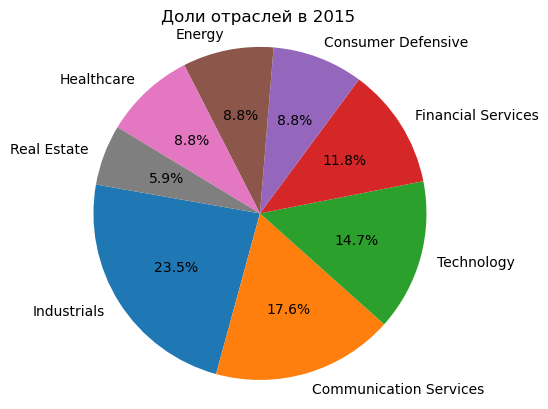

In [268]:
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=170)
ax.axis('equal') 
plt.title("Доли отраслей в 2015")

In [127]:
df_indicators_14 = df_indicators[["indicators", "ROE_8", "P/B_8", "Ndebt/Capital_8", "YTD_Total_R_7", "sector", "label_2015"]]

In [128]:
df_indicators_14

,indicators,ROE_8,P/B_8,Ndebt/Capital_8,YTD_Total_R_7,sector,label_2015
0,PG.N,0.176200,3.462269,0.20067,0.093727,Consumer Defensive,0
1,DTE.N,0.098849,1.395939,0.52329,0.269254,Utilities,0
2,CFG.N,0.043000,0.712532,0.31043,0.388012,Financial Services,0
3,CHTR.OQ,-5.420000,5.744439,1.00115,0.421831,Communication Services,0
4,PSTG.N,-1.180400,4.399592,1.07347,0.273603,Technology,0
...,...,...,...,...,...,...,...
505,CSCO.OQ,0.195100,2.419076,0.41220,0.151903,Technology,0
506,ESS.N,0.037000,2.539344,0.45201,0.001303,Real Estate,0
507,DINO.N,0.157000,1.368548,0.12110,0.140455,Energy,0
508,DXCM.OQ,-0.088500,30.249684,0.50515,0.271062,Healthcare,1


In [39]:
#первый кластер




In [139]:
df_0_14 = df_indicators_14[(df_indicators_14["label_2015"] == 2)]

In [140]:
df_0_14

,indicators,ROE_8,P/B_8,Ndebt/Capital_8,YTD_Total_R_7,sector,label_2015
180,INCY.OQ,0.14590,118.268350,0.11111,0.075426,Healthcare,2
252,SPGI.N,0.03776,135.166392,0.44491,0.105498,Financial Services,2
438,CLX.N,4.45590,113.376784,0.78346,0.029876,Consumer Defensive,2
447,PODD.OQ,-1.05050,63.242258,0.25912,0.003438,Healthcare,2


In [141]:
x = df_0_14["sector"].value_counts()
# Названия отраслей и их значения
labels = x.index
sizes = x.values

Text(0.5, 1.0, 'Доли отраслей в кластере 1')

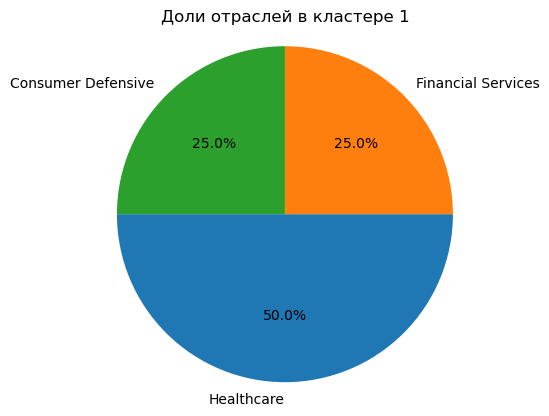

In [142]:
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=180)
ax.axis('equal') 
plt.title("Доли отраслей в кластере 1")

In [125]:
df_0_14.agg(["mean", "median", "std"])

C:\Users\david\AppData\Local\Temp\ipykernel_15080\2012520612.py:1: FutureWarning: ['indicators', 'sector'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_0_14.agg(["mean", "median", "std"])


,ROE_7,P/B_7,Ndebt/Capital_7,YTD_Total_R_6,label_2016
mean,0.136317,6.019777,0.574664,0.310459,1.0
median,0.153400,3.523296,0.529800,0.217734,1.0
std,0.757700,8.458791,0.160763,0.332354,0.0


In [113]:
df_0_14.agg(["mean", "median", "std"])

C:\Users\david\AppData\Local\Temp\ipykernel_15080\2012520612.py:1: FutureWarning: ['indicators', 'sector'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_0_14.agg(["mean", "median", "std"])


,ROE_8,P/B_8,Ndebt/Capital_8,YTD_Total_R_7,label_2015
mean,0.233287,4.676198,0.396466,0.219178,0.0
median,0.166600,3.124568,0.353420,0.185120,0.0
std,0.688678,5.231567,0.455150,0.213498,0.0


In [126]:
df_0_14[(df_0_14["ROE_7"] > df_0_14["ROE_7"].median() * (1-0.2))
       & (df_0_14["ROE_7"] < df_0_14["ROE_7"].median() * (1+0.2))
       & (df_0_14["P/B_7"] > np.percentile(df_0_14["P/B_7"], 40))
       & (df_0_14["P/B_7"] < np.percentile(df_0_14["P/B_7"], 60))
       & (df_0_14["Ndebt/Capital_7"] < np.percentile(df_0_14["Ndebt/Capital_7"], 60))]["indicators"]

6        CSX.OQ
13        XYL.N
46       SCHW.N
149      WTRG.N
193      SCCO.N
198     DLTR.OQ
335       STZ.N
395      LKQ.OQ
439    CMCSA.OQ
479     ISRG.OQ
Name: indicators, dtype: object

In [46]:
df_0_14[ 
(df_0_14["ROE_8"] > df_0_14["ROE_8"].median() * (1-0.3))
& (df_0_14["ROE_8"] < df_0_14["ROE_8"].median() * (1+0.3))
& (df_0_14["P/B_8"] > np.percentile(df_0_14["P/B_8"], 30))
& (df_0_14["P/B_8"] < np.percentile(df_0_14["P/B_8"], 60))
& (df_0_14["Ndebt/Capital_8"] > np.percentile(df_0_14["Ndebt/Capital_8"], 50))
& (df_0_14["Ndebt/Capital_8"] < np.percentile(df_0_14["Ndebt/Capital_8"], 70))]

,indicators,ROE_8,P/B_8,Ndebt/Capital_8,YTD_Total_R_8,sector,label_2015
159,UDR.N,0.1195,3.447765,0.48047,0.259640,Real Estate,0
285,BSX.N,0.1925,3.929142,0.44661,0.391698,Healthcare,0
496,RCL.N,0.1303,2.736325,0.50666,0.247412,Consumer Cyclical,0


In [673]:
df_1_14 = df_indicators_14[(df_indicators_14["label_2023"] == 1)]
df_1_14["sector"].value_counts()

Technology                30
Industrials               16
Consumer Cyclical         15
Communication Services     6
Financial Services         3
Healthcare                 2
Utilities                  1
Basic Materials            1
Name: sector, dtype: int64

In [674]:
df_1_14.agg(["mean", "median", "std"])

C:\Users\david\AppData\Local\Temp\ipykernel_13068\2275218242.py:1: FutureWarning: ['indicators', 'sector'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_1_14.agg(["mean", "median", "std"])


,ROE_0,P/B_0,Ndebt/Capital_0,YTD_Total_R_0,label_2023
mean,0.311147,10.451020,0.334233,0.852747,1.0
median,0.279690,6.745981,0.280465,0.770699,1.0
std,0.331293,11.275043,0.253271,0.344371,0.0


In [677]:
company_local.extend(df_1_14[(df_1_14["ROE_0"] > np.percentile(df_1_14["ROE_0"], 50) * (1-0.2))
       &(df_1_14["ROE_0"] < np.percentile(df_1_14["ROE_0"], 50) * (1+0.2))
       &(df_1_14["P/B_0"] > np.percentile(df_1_14["P/B_0"], 40))
       &(df_1_14["P/B_0"] < np.percentile(df_1_14["P/B_0"], 70))
       &(df_1_14["Ndebt/Capital_0"] < np.percentile(df_1_14["Ndebt/Capital_0"], 60))]["indicators"])

In [647]:
df_2_14 = df_indicators_14[df_indicators_14["label_2022"] == 2]
df_2_14["sector"].value_counts()

Technology                27
Healthcare                21
Financial Services        20
Industrials               19
Real Estate               16
Consumer Cyclical         15
Basic Materials            8
Consumer Defensive         7
Energy                     7
Communication Services     6
Name: sector, dtype: int64

In [648]:
df_2_14.agg(["mean", "median", "std"])

C:\Users\david\AppData\Local\Temp\ipykernel_13068\3378527156.py:1: FutureWarning: ['indicators', 'sector'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_2_14.agg(["mean", "median", "std"])


,ROE_1,P/B_1,Ndebt/Capital_1,YTD_Total_R_1,YTD_Total_R_0,label_2022
mean,0.234002,8.416614,0.324006,0.334098,0.314658,2.0
median,0.188395,3.112795,0.349650,0.332460,0.228869,2.0
std,0.253885,32.968584,0.161411,0.071448,0.280764,0.0


In [650]:
company_local.extend(df_2_14[(df_2_14["ROE_1"] > np.percentile(df_2_14["ROE_1"], 50) * (1-0.2))
       &(df_2_14["ROE_1"] < np.percentile(df_2_14["ROE_1"], 50) * (1+0.2))
       &(df_2_14["P/B_1"] > np.percentile(df_2_14["P/B_1"], 40))
       &(df_2_14["P/B_1"] < np.percentile(df_2_14["P/B_1"], 60))
       &(df_2_14["Ndebt/Capital_1"] < np.percentile(df_2_14["Ndebt/Capital_1"], 60))]["indicators"])

In [678]:
df_3_14 = df_indicators_14[df_indicators_14["label_2023"] == 3]
df_3_14


,indicators,ROE_0,P/B_0,Ndebt/Capital_0,YTD_Total_R_0,sector,label_2023
1,DTE.N,0.110390,2.059089,0.65263,0.028143,Utilities,3
3,CHTR.OQ,0.451090,5.091668,0.86287,0.146211,Communication Services,3
4,PSTG.N,0.412956,10.510916,1.04452,0.332586,Technology,3
6,CSX.OQ,0.300100,5.599448,0.55752,0.135055,Industrials,3
7,MCO.N,0.624290,21.478624,0.45891,0.415162,Financial Services,3
...,...,...,...,...,...,...,...
493,MS.N,0.094000,1.680198,0.57135,0.139088,Financial Services,3
494,PFGC.N,0.171990,2.484870,0.51541,0.184278,Consumer Defensive,3
502,SSNC.OQ,0.189290,2.377078,0.47934,0.192128,Technology,3
506,ESS.N,0.072900,2.935527,0.49138,0.219286,Real Estate,3


In [683]:
company_local.extend(df_3_14[(df_3_14["ROE_0"] > np.percentile(df_3_14["ROE_0"], 50) * (1-0.2))
       &(df_3_14["ROE_0"] < np.percentile(df_3_14["ROE_0"], 50) * (1+0.2))
       &(df_3_14["P/B_0"] > np.percentile(df_3_14["P/B_0"], 20))
       &(df_3_14["P/B_0"] < np.percentile(df_3_14["P/B_0"], 60))
       &(df_3_14["Ndebt/Capital_0"] < np.percentile(df_3_14["Ndebt/Capital_0"], 60))]["indicators"])

In [682]:
len(company_local)

21

In [637]:
company_local

[]

In [684]:
company_local.extend((len(df_company) - len(company_local)) * [ None])

In [664]:
company_local = []

In [685]:
df_company["2023"] = company_local

In [687]:
#df_company.to_excel(r"C:\Users\david\Desktop\дипломная\код\data\selected_companies.xlsx")

In [298]:
df_company = pd.DataFrame()

In [46]:
#отбор Utilities

tech_14[(tech_14["ROE_9"] > tech_14["ROE_9"].mean() * (1-0.4))
       &(tech_14["ROE_9"] < tech_14["ROE_9"].mean() * (1+0.4))
       &(tech_14["P/B_9"] > tech_14["P/B_9"].mean()* (1-0.3))]

,indicators,ROE_9,ROE_8,ROE_7,P/B_9,P/B_8,P/B_7,YTD_Total_R_9,YTD_Total_R_8,YTD_Total_R_7,YTD_Total_R_6,sector
1,DTE.N,0.10040,0.098849,0.1066,1.561991,1.395939,1.669018,0.347455,0.037207,0.269254,0.145880,Utilities
11,PEG.N,0.11770,0.147800,0.1126,1.719056,1.498327,1.687692,0.343634,0.027841,0.177785,0.217734,Utilities
29,CNP.N,0.12300,0.118600,0.1448,2.215237,2.282468,3.067057,0.051496,0.175665,0.408826,0.195898,Utilities
91,PPL.N,0.12490,0.126500,0.1689,1.646905,2.318655,2.338099,0.261699,0.062167,0.041016,0.051993,Utilities
117,ATO.N,0.10020,0.100800,0.1049,1.551572,1.848017,2.234934,0.264724,0.163334,0.204228,0.184019,Utilities
119,CMS.N,0.13640,0.143800,0.1375,2.605777,2.539709,2.732261,0.345821,0.073281,0.188506,0.170168,Utilities
121,ED.N,0.09190,0.093300,0.0876,1.537274,1.442776,1.571716,0.247959,0.014100,0.189362,0.192735,Utilities
141,AGR.N,0.13544,0.019400,0.0425,1.733392,0.787909,0.774681,0.283576,0.063123,0.029591,0.385608,Utilities
145,XEL.OQ,0.10330,0.080330,0.1039,1.778449,1.719247,1.873174,0.334760,0.038347,0.171373,0.218941,Utilities
149,WTRG.N,0.13410,0.131700,0.1310,2.850957,3.048220,2.880395,0.160990,0.144946,0.032198,0.337604,Utilities


In [167]:
#отбор компаний ТЕХ СЕКТОРА # на него будет приходиться порядка 10 -15 %

tech_14[(tech_14["ROE_9"] > np.percentile(tech_14["ROE_9"], 25))
       & (tech_14["ROE_9"] < np.percentile(tech_14["ROE_9"], 75))
       & (tech_14["P/B_9"] > np.percentile(tech_14["P/B_9"], 30))
       & (tech_14["P/B_9"] < np.percentile(tech_14["P/B_9"], 90))]

,indicators,ROE_9,ROE_8,ROE_7,ROE_6,P/B_9,P/B_8,P/B_7,P/B_6,YTD_Total_R_9,YTD_Total_R_8,YTD_Total_R_7,YTD_Total_R_6,sector
17,CDNS.OQ,0.230500,0.251600,0.331700,0.4536,4.117152,4.549720,9.455299,11.924806,0.353067,0.096995,0.211917,0.658208,Technology
20,CTSH.OQ,0.229400,0.220800,0.206700,0.2104,4.146017,3.939662,3.175451,3.914121,0.042979,0.139765,0.066478,0.275798,Technology
67,APH.N,0.249500,0.250300,0.247600,0.2747,5.735612,4.967374,5.637639,6.727270,0.217642,0.019831,0.298840,0.318053,Technology
69,ROP.OQ,0.144700,0.135000,0.121400,0.1541,3.292012,3.612815,3.215502,3.867624,0.133828,0.221271,0.028820,0.423845,Technology
81,MPWR.OQ,0.196300,0.145500,0.240900,0.2676,5.575532,6.861537,7.752369,8.957254,0.449424,0.299839,0.300405,0.382199,Technology
86,CPAY.N,0.224000,0.203500,0.214200,0.2363,5.205553,4.665417,4.214203,4.700361,0.269182,0.038868,0.009865,0.359737,Technology
126,FICO.N,0.188700,0.181800,0.240200,0.3609,3.884152,6.050382,8.625672,9.961953,0.152079,0.303814,0.266780,0.285214,Technology
163,ZBRA.OQ,0.196900,0.283300,0.347800,0.4662,3.845086,4.068391,5.726493,6.625787,0.431398,0.100245,0.231299,0.210354,Technology
203,ANSS.OQ,0.148600,0.142100,0.146700,0.1562,3.356372,3.715278,3.588684,5.532842,0.059633,0.128049,0.000108,0.595740,Technology
247,FI.N,0.247700,0.309300,0.381800,0.4184,5.175748,7.746593,9.013514,9.967993,0.201863,0.288714,0.162038,0.233816,Technology


In [113]:
tech_14[(tech_14["ROE_9"] > tech_14["ROE_9"].mean()) 
     & (tech_14["P/B_9"] > tech_14["P/B_9"].median())
     & (tech_14["P/B_9"] < tech_14["P/B_9"].mean() + 5)
     & (tech_14["YTD_Total_R_9"] > tech_14["YTD_Total_R_9"].median())
     & (tech_14["YTD_Total_R_9"] < tech_14["YTD_Total_R_9"].mean() + 0.1)]


,indicators,ROE_9,P/B_9,Ndebt/Capital_9,YTD_Total_R_9,sector
4,PSTG.N,0.280000,9.101275,0.78943,0.405299,Technology
86,CPAY.N,0.224000,5.205553,0.50169,0.269182,Technology
195,EPAM.N,0.263300,4.970385,0.47626,0.366629,Technology
230,AAPL.OQ,0.336100,5.298356,0.06958,0.405948,Technology
402,TTD.OQ,0.215577,7.372493,0.00538,0.330445,Technology
422,TXN.OQ,0.266200,5.385746,0.07257,0.250970,Technology


In [136]:
2015 + 250

2265

In [138]:
df_prices["AAPL"][2015:2265]

Date
2015-12-28    26.897499
2015-12-24    27.250000
2015-12-23    26.817499
2015-12-22    26.850000
2015-12-21    26.820000
                ...    
2015-01-07    26.799999
2015-01-06    26.635000
2015-01-05    27.072500
2015-01-02    27.847500
2014-12-31    28.205000
Name: AAPL, Length: 250, dtype: float64

In [115]:
df_prices[["PSTG", "CPAY", "EPAM", "AAPL", "TTD", "TXN"]]

KeyError: "['PSTG', 'CPAY', 'EPAM', 'TTD'] not in index"

# СТАТ ТЕСТЫ НА ЗНАЧИМОСТЬ СВЯЗЕЙ

In [51]:
df_indicators.columns[22:32]

Index(['Ndebt/Capital_0', 'Ndebt/Capital_1', 'Ndebt/Capital_2',
       'Ndebt/Capital_3', 'Ndebt/Capital_4', 'Ndebt/Capital_5',
       'Ndebt/Capital_6', 'Ndebt/Capital_7', 'Ndebt/Capital_8',
       'Ndebt/Capital_9'],
      dtype='object')

In [52]:
# 1 - СВЯЗЬ МЕЖДУ БАЛАНСОВОЙ СТОИМОСТЬЮ И ДОХОД В СЛЕД ПЕРИОД

df_p_b_return = df_indicators.iloc[:, np.r_[22:32, 32:43]]

In [55]:
data_test_b_r = []

for i in range(len(df_p_b_return)):
    local_sector = df_p_b_return.iloc[i, :][-1]
    #1 - текущая балансовая стоимость 2 - будущая годовая доходность 3 - сектор
    values_b = zip(df_p_b_return.iloc[i, :10][1:], df_p_b_return.iloc[i, 10:-1][:-1], df_p_b_return.iloc[i, 10:-1].diff(-1)[:-1])
    for b, r, d in values_b:
        local_tuple_b = (b, r, d, local_sector)
        data_test_b_r.append(local_tuple_b)
    
    

In [64]:
np.mean(list(df_p_b_return.mean()))

C:\Users\david\AppData\Local\Temp\ipykernel_14916\3502523706.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  np.mean(list(df_p_b_return.mean()))


0.3240158186734247

In [56]:
data_test_b_r[0]

(0.30989, 0.0084841950581277, -0.04193240508724029, 'Consumer Defensive')

In [65]:
more_20 = []
less_20 = []

for i in data_test_b_r:
    if 0.3240158186734247 < i[0]:
        more_20.append(i)
    else:
        less_20.append(i)
    

In [66]:
#создам один df

df_more_20 = pd.DataFrame(more_20, columns=['BookValue', 'AnnualReturn', 'diff', 'Sector'])
df_less_20 = pd.DataFrame(less_20, columns=['BookValue', 'AnnualReturn', 'diff', 'Sector'])

#поставлю метки для дальнейшего обьединения
df_more_20["Group"] = 'More than 20'
df_less_20['Group'] = 'Less than 20'

#вертикальная конкатенация 
df_test_b = pd.concat([df_more_20, df_less_20])

In [67]:
df_test_b

,BookValue,AnnualReturn,diff,Sector,Group
0,0.64702,0.028143,0.015485,Utilities,More than 20
1,0.67486,0.012658,-0.181510,Utilities,More than 20
2,0.59186,0.194168,0.165144,Utilities,More than 20
3,0.59273,0.029024,-0.184586,Utilities,More than 20
4,0.56777,0.213610,0.171677,Utilities,More than 20
...,...,...,...,...,...
2065,0.16967,0.156421,-0.295895,Healthcare,Less than 20
2066,0.27154,0.452315,-0.237911,Healthcare,Less than 20
2067,0.22840,0.690226,-0.135651,Healthcare,Less than 20
2068,0.21215,0.825876,-0.261595,Healthcare,Less than 20


In [68]:
#проверка на нормальность и однородность дисперсий годовой доходности акций

In [69]:
#оценка нормальности расрпеделения годовой доходности для группы балансовая стоимость которых больше 20
#p меньше 0.05 - альтернативная гипотеза предполгающая ненормальность распределения

shapiro_more_20 = stats.shapiro(df_test_b[df_test_b["Group"] == "More than 20"]["diff"])
c = stats.shapiro(df_test_b[df_test_b["Group"] == "Less than 20"]["diff"])

In [70]:
print(shapiro_more_20[1] < 0.05)
print(c[1] < 0.05)

True
True


In [72]:
# Тест Левена на проверку равенства дисперсий (смотрит отклонения значений )

# меньше 0.05 - дисперсии различаются значительно

levene_test = stats.levene(df_more_20['AnnualReturn'], df_less_20['AnnualReturn'])



In [73]:
levene_test

LeveneResult(statistic=0.02176684445165519, pvalue=0.8827155214043654)

In [332]:
#Т к мои данные ненормально распределены - использую непараметрический тест
# U-критерий Манна-Уитни чтобы сравнить медианные значения двух групп

In [361]:
mann_whitney_test_result = stats.mannwhitneyu(df_more_20['AnnualReturn'], df_less_20['AnnualReturn'].sample(len(df_more_20['AnnualReturn'])), alternative='two-sided')
mann_whitney_test_result

MannwhitneyuResult(statistic=2932.0, pvalue=0.8726485239629653)

In [354]:
#имеется достаточно стат данных чтобы отвергнуть нулевую гипотезу (распрпделения доходности двух групп равны)

mann_whitney_test_result

MannwhitneyuResult(statistic=2879.0, pvalue=0.9750127020790191)

In [309]:
(df_test_b[df_test_b["Group"] =="More than 20"]["diff"] < 0).sum()

135

In [312]:
(df_test_b[df_test_b["Group"] =="Less than 20"]["diff"].sample(len(df_test_b[df_test_b["Group"] =="More than 20"]["diff"])) < 0).sum()

118